<a href="https://colab.research.google.com/github/ghlim40/BT/blob/Predict/AI_Predict_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyupbit
!pip install datetime
!pip install numpy
!pip install pyjwt
!pip install datetime
!pip install schedule
!pip install Prophetb

     |████████████████████████████████| 103 kB 50.4 MB/s 
     |████████████████████████████████| 60 kB 6.4 MB/s 
     |████████████████████████████████| 251 kB 54.8 MB/s 
ERROR: Could not find a version that satisfies the requirement Prophetb (from versions: none)
ERROR: No matching distribution found for Prophetb


In [3]:
import pyupbit
import datetime
import time, calendar
import numpy as np
import datetime
import schedule
from fbprophet import Prophet

In [4]:
coin = "KRW-XRP" 

In [6]:
#전처리
df_predict = pyupbit.get_ohlcv(coin, interval="minute60")
df_predict

df_predict = df_predict.reset_index()
df_predict['ds'] = df_predict['index']
df_predict['y'] = df_predict['close']
data_predict = df_predict[['ds','y']]
data_predict

,ds,y
0,2022-01-04 07:00:00,1015.0
1,2022-01-04 08:00:00,1020.0
2,2022-01-04 09:00:00,1010.0
3,2022-01-04 10:00:00,1010.0
4,2022-01-04 11:00:00,1005.0
...,...,...
195,2022-01-12 10:00:00,944.0
196,2022-01-12 11:00:00,938.0
197,2022-01-12 12:00:00,939.0
198,2022-01-12 13:00:00,936.0


In [8]:
#학습
model = Prophet()
model.fit(data_predict)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [9]:
#예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

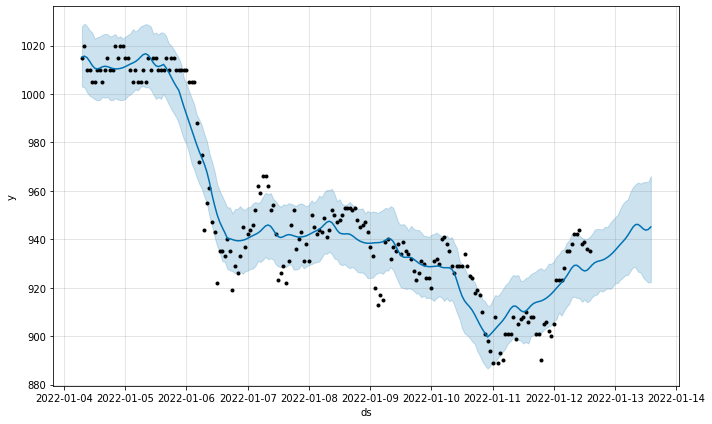

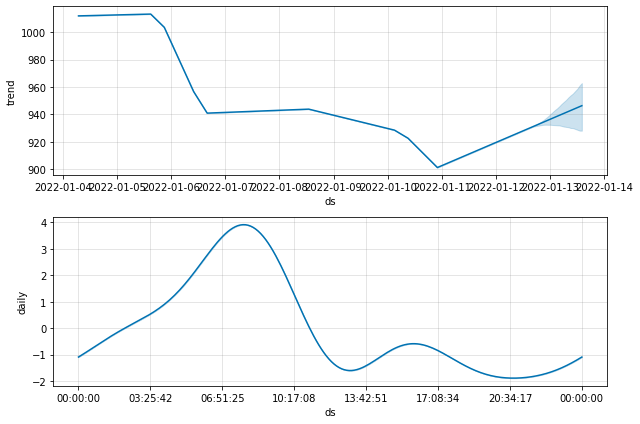

In [10]:
#그래프
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)